A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.4) Analyse the effects of one variable on another with the help of an interaction plot. 
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

1.6) Mention the business implications of performing ANOVA for this particular case study.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA)
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene

In [4]:
fever = pd.read_csv('Fever.csv')

In [5]:
fever.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [6]:
fever.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [7]:
fever.shape

(36, 4)

In [8]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [9]:
fever.A = pd.Categorical(fever.A)
fever.B = pd.Categorical(fever.B)

In [10]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


In [11]:
fever.describe()

,Volunteer,Relief
count,36.000000,36.000000
mean,2.500000,7.183333
std,1.133893,3.272090
min,1.000000,2.300000
25%,1.750000,4.675000
50%,2.500000,6.000000
75%,3.250000,9.325000
max,4.000000,13.500000


In [12]:
# total distinct count of ingredient 'A'
fever.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [13]:
#unique levels of ingredient 'A'
fever['A'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [14]:
# total distinct count of ingredient 'B'
fever.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [15]:
#unique levels of ingredient 'B'
fever['B'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

**From the distribution plot 'A' and 'B' , the data looks far from normal.
Hence, we apply Shapiro test and the statistical results confirm the same. P-value forboth A and B is very close to zero, indicating data is not-normal for both ingredients**

### Formulate the hypothesis of the One-way ANOVA with variable 'A'

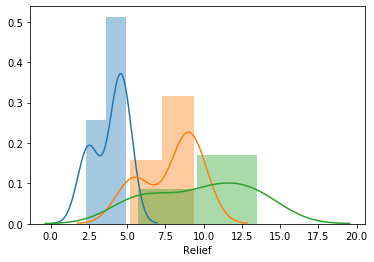

In [100]:
#between-level distribution for 'A'; 
#from graph there is no vidence of normality in dat, but we can still check with Shapiro test
sns.distplot(fever.loc[fever['A'] == 1]['Relief'])
sns.distplot(fever.loc[fever['A'] == 2]['Relief'])
sns.distplot(fever.loc[fever['A'] == 3]['Relief'])

In [104]:
print('shapiro for 1', shapiro(fever['Relief'][fever['A'] == 1]))
print('shapiro for 2', shapiro(fever['Relief'][fever['A'] == 2]))
print('shapiro for 3', shapiro(fever['Relief'][fever['A'] == 3]))

shapiro for 1 (0.7686296701431274, 0.004211828112602234)
shapiro for 2 (0.728706955909729, 0.001616060733795166)
shapiro for 3 (0.847996175289154, 0.03468279168009758)


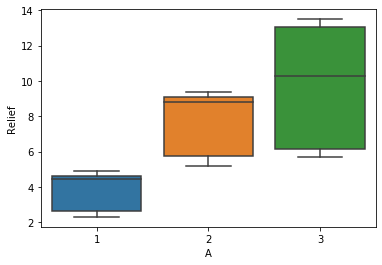

In [16]:
sns.boxplot(x='A', y='Relief',data=fever)
plt.show()

In [111]:
levene(fever['Relief'][fever['A'] == 1],
       fever['Relief'][fever['A'] == 2],
       fever['Relief'][fever['A'] == 3])

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

From above analysis, we can verify that:
Shapiro test of normality does not qualify for ingredient 'A', as p-values of all levels is less than .05, hence, 'A' is not distributed normally. 
However, if normality assumption does not satisfy, ANOVA can still perform given the variances of different groups are equal.
Form the box plot, we find no conclusion on equalit of variance , hence, apply Levene's test
The p-value in Levene's test is .185 which is less than .05 but more than .01, hence at 1% level of significance we can accept the Null hypothesis i.e there is equality of variance in different levels of 'A'

**H0 - All the means of Relief variable due to different levels of ingredient 'A' is equal**

**H1 - Atleast one of the means of Releif variable due to different levels of ingredient 'A' is different**

In [14]:
# One way ANOVA: to check whether releif is effected by different levels of ingredient 'A'

formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Since p-value is lower than 0.05, we can say that at least one of the mean releif caused by level of ingredient 'A' is different

In [56]:
fever['A'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

### Formulate the hypothesis of the One-way ANOVA with variable 'B'

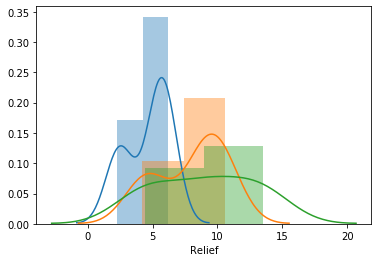

In [103]:
#between-level distribution for 'B'
#from graph there is no vidence of normality in dat, but we can still check with Shapiro test
sns.distplot(fever.loc[fever['B'] == 1]['Relief'])
sns.distplot(fever.loc[fever['B'] == 2]['Relief'])
sns.distplot(fever.loc[fever['B'] == 3]['Relief'])

In [102]:
print('shapiro for 1', shapiro(fever['Relief'][fever['B'] == 1]))
print('shapiro for 2', shapiro(fever['Relief'][fever['B'] == 2]))
print('shapiro for 3', shapiro(fever['Relief'][fever['B'] == 3]))

shapiro for 1 (0.7656338810920715, 0.003910908009856939)
shapiro for 2 (0.8065383434295654, 0.01112875435501337)
shapiro for 3 (0.8446834087371826, 0.031581711024045944)


In [106]:
levene(fever['Relief'][fever['B'] == 1],
       fever['Relief'][fever['B'] == 2],
       fever['Relief'][fever['B'] == 3])

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

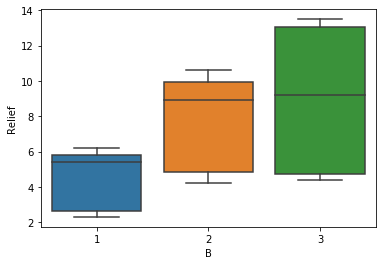

In [113]:
# plotbox-plot for visualising variance.There can be no conclusive inference that variance at all levels of 'B' are equal
sns.boxplot(x='B', y='Relief',data=fever)
plt.show()

From above analysis, we can verify that:
Shapiro test of normality does not qualify for ingredient 'B', as p-values of all levels is less than .05, hence, 'B' is not distributed normally. 
However, if normality assumption does not satisfy, ANOVA can still perform given the variances of different groups are equal.
Form the box plot, we find no conclusion on equalit of variance , hence, apply Levene's test
The p-value in Levene's test is .06 which is enough evidence to reject Null hypothesis at 5% level of significance i.e there is equality of variance in different levels of 'B'

**H0 - All the means of Relief variable due to different levels of ingredient 'B' is equal**

**H1 - Atleast one of the means of Releif variable due to different levels of ingredient 'B' is different**

In [114]:
# One way ANOVA: to check whether releif is effected by different levels of ingredient 'B'

formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Since p-value is lower than 0.05, we can say that at least one of the mean releif caused by level of ingredient 'B' is different

### ANOVA two-way to check the combined impact of ingredient 'A' and 'B'

H0 - The means of 'Relief' variable with respect to each ingredient 'A' and 'B' is equal.

H1 - At least one of the means of 'Relief' variable with respect to 'A' and 'B' is different

In [23]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula,fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


since p-value for both 'A' and 'B' is quite les than 0.05, we can reject H0 i.e , means of Releif variable is different w.r.t ingredient 'A' and 'B'

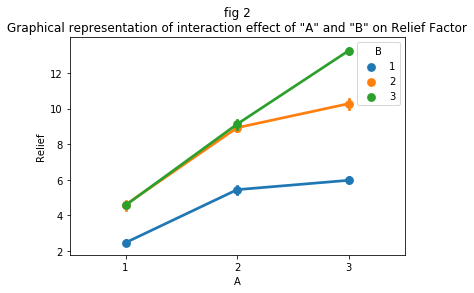

In [35]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=fever)
plt.title('fig 2\nGraphical representation of interaction effect of "A" and "B" on Relief Factor')
plt.show()

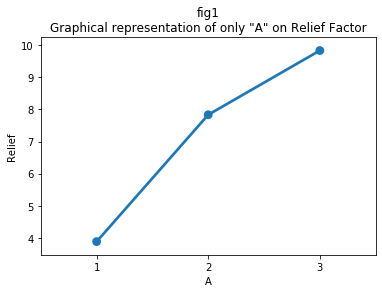

In [36]:
sns.pointplot(x = 'A', y = 'Relief',data=fever, ci=False)
plt.title('fig1\nGraphical representation of only "A" on Relief Factor')
plt.show()

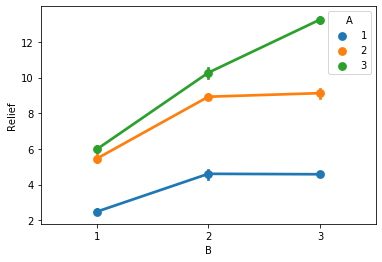

In [25]:
sns.pointplot(x = 'B', y = 'Relief', hue='A',data=fever)
plt.show()

In [37]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


Even the p-value with interaction effect for variable 'A' and 'B' is much lower than 0.05, hence , H0 is rejected. 

It can be stated that the means of 'Releif' variable is different for different ingredients 'A' and 'B'.